In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc

In [2]:
# Import our input dataset
hoops_df = pd.read_csv('../Resources/cbb.csv')
hoops_df

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,...,30.4,53.9,44.6,32.7,36.2,71.7,8.6,2ND,1.0,2016
1,Wisconsin,B10,40,36,129.1,93.6,0.9758,54.8,47.7,12.4,...,22.4,54.8,44.7,36.5,37.5,59.3,11.3,2ND,1.0,2015
2,Michigan,B10,40,33,114.4,90.4,0.9375,53.9,47.7,14.0,...,30.0,54.7,46.8,35.2,33.2,65.9,6.9,2ND,3.0,2018
3,Texas Tech,B12,38,31,115.2,85.2,0.9696,53.5,43.0,17.7,...,36.6,52.8,41.9,36.5,29.7,67.5,7.0,2ND,3.0,2019
4,Gonzaga,WCC,39,37,117.8,86.3,0.9728,56.6,41.1,16.2,...,26.9,56.3,40.0,38.2,29.0,71.5,7.7,2ND,1.0,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2450,Michigan St.,B10,35,26,111.4,87.8,0.9392,50.6,44.5,20.8,...,32.4,50.4,44.3,34.1,30.1,64.4,6.7,S16,3.0,2013
2451,Arizona,P12,35,27,114.4,92.2,0.9229,52.5,46.6,19.5,...,32.9,50.6,43.4,37.1,35.8,66.8,4.6,S16,6.0,2013
2452,Oregon,P12,37,28,104.8,88.6,0.8728,49.3,46.4,21.4,...,33.3,49.1,44.9,33.3,33.4,69.2,2.9,S16,12.0,2013
2453,La Salle,A10,34,24,112.0,96.2,0.8516,51.9,49.3,17.1,...,28.5,49.3,50.6,37.7,30.2,66.0,0.3,S16,13.0,2013


In [3]:
hoops_df = hoops_df.drop(["TEAM","SEED","CONF","G","YEAR"], axis=1)
hoops_df

,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON
0,33,123.3,94.9,0.9531,52.6,48.1,15.4,18.2,40.7,30.0,32.3,30.4,53.9,44.6,32.7,36.2,71.7,8.6,2ND
1,36,129.1,93.6,0.9758,54.8,47.7,12.4,15.8,32.1,23.7,36.2,22.4,54.8,44.7,36.5,37.5,59.3,11.3,2ND
2,33,114.4,90.4,0.9375,53.9,47.7,14.0,19.5,25.5,24.9,30.7,30.0,54.7,46.8,35.2,33.2,65.9,6.9,2ND
3,31,115.2,85.2,0.9696,53.5,43.0,17.7,22.8,27.4,28.7,32.9,36.6,52.8,41.9,36.5,29.7,67.5,7.0,2ND
4,37,117.8,86.3,0.9728,56.6,41.1,16.2,17.1,30.0,26.2,39.0,26.9,56.3,40.0,38.2,29.0,71.5,7.7,2ND
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2450,26,111.4,87.8,0.9392,50.6,44.5,20.8,19.2,36.1,27.6,36.6,32.4,50.4,44.3,34.1,30.1,64.4,6.7,S16
2451,27,114.4,92.2,0.9229,52.5,46.6,19.5,19.8,35.0,26.7,37.4,32.9,50.6,43.4,37.1,35.8,66.8,4.6,S16
2452,28,104.8,88.6,0.8728,49.3,46.4,21.4,22.0,35.8,27.2,38.4,33.3,49.1,44.9,33.3,33.4,69.2,2.9,S16
2453,24,112.0,96.2,0.8516,51.9,49.3,17.1,21.3,29.0,34.2,31.3,28.5,49.3,50.6,37.7,30.2,66.0,0.3,S16


In [4]:
tourney_list = hoops_df['POSTSEASON'].value_counts()
tourney_list

R64          224
R32          112
S16           56
E8            28
R68           28
F4            14
2ND            7
Champions      7
Name: POSTSEASON, dtype: int64

In [5]:
tourney_list_to_replace = list(tourney_list.index)

for place in tourney_list_to_replace:
  hoops_df['POSTSEASON'] = hoops_df['POSTSEASON'].replace(place,"1")

hoops_df['POSTSEASON'].value_counts()

1    476
Name: POSTSEASON, dtype: int64

In [6]:
hoops_df['POSTSEASON'] = hoops_df['POSTSEASON'].fillna(0)

In [7]:
hoops_df['POSTSEASON'] = pd.to_numeric(hoops_df['POSTSEASON'])

In [8]:
y = hoops_df['POSTSEASON'].values
X = hoops_df.drop(['POSTSEASON'], 1).values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=47)

/Users/tommysmacbook/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [9]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [10]:
classifier = LogisticRegression(max_iter=10000)
classifier

LogisticRegression(max_iter=10000)

In [11]:
classifier.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=10000)

In [12]:
print(f"Training Data Score: {classifier.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test_scaled, y_test)}")

Training Data Score: 0.9141770776751765
Testing Data Score: 0.9136807817589576


In [13]:
y_true = y_test
y_pred = classifier.predict(X_test_scaled)
confusion_matrix(y_true, y_pred)

array([[482,  18],
       [ 35,  79]])

In [14]:
confusion_matrix(y, classifier.predict(X))

array([[1347,  632],
       [  31,  445]])

In [15]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95       500
           1       0.81      0.69      0.75       114

    accuracy                           0.91       614
   macro avg       0.87      0.83      0.85       614
weighted avg       0.91      0.91      0.91       614



In [16]:
classifier.predict(X_test_scaled[0:10])

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [17]:
classifier.predict_proba(X_test_scaled[0:10])

array([[9.74636073e-01, 2.53639268e-02],
       [4.55333685e-04, 9.99544666e-01],
       [6.93561074e-01, 3.06438926e-01],
       [9.94516587e-01, 5.48341304e-03],
       [9.99601068e-01, 3.98931987e-04],
       [9.92554434e-01, 7.44556628e-03],
       [9.32263182e-01, 6.77368176e-02],
       [9.98839232e-01, 1.16076849e-03],
       [9.98229052e-01, 1.77094770e-03],
       [8.81512796e-01, 1.18487204e-01]])

In [18]:
y_pred_proba_knn = classifier.predict_proba(X_test_scaled)[:,1]
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_pred_proba_knn)

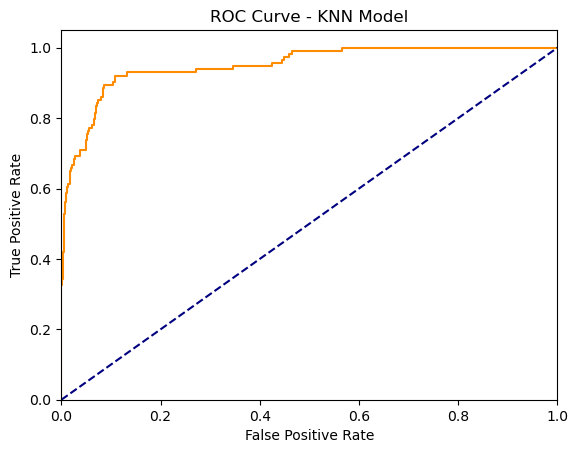

In [19]:
plt.figure()
plt.plot(fpr_knn, tpr_knn, color='darkorange')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - KNN Model')
plt.show()

In [20]:
roc_auc_knn = auc(fpr_knn, tpr_knn)
print(f"AUC for the KNN Model: {roc_auc_knn}")

AUC for the KNN Model: 0.9495263157894738


In [21]:
# Import our input dataset
hoops20_df = pd.read_csv('../Resources/cbb20.csv')
hoops20_df

,RK,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,...,ORB,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB
0,1,Kansas,B12,30,28,116.1,87.7,0.9616,53.7,43.7,...,32.6,26.4,35.8,23.2,54.9,42.4,34.1,30.5,67.4,10.8
1,2,Baylor,B12,30,26,114.5,88.4,0.9513,49.4,45.2,...,35.8,29.8,30.8,30.8,47.5,44.4,35.1,31.1,66.2,8.5
2,3,Gonzaga,WCC,33,31,121.3,94.3,0.9472,57.5,47.6,...,33.6,22.7,38.8,21.8,57.4,47.4,38.6,32.0,72.0,7.7
3,4,Dayton,A10,31,29,119.5,93.4,0.9445,59.7,46.6,...,26.4,26.6,33.9,30.9,62.3,45.1,37.1,33.0,67.5,6.8
4,5,Michigan St.,B10,31,22,114.8,91.3,0.9326,52.6,43.3,...,32.8,26.0,30.8,29.3,52.9,43.4,34.8,28.7,69.3,5.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348,349,Arkansas Pine Bluff,SWAC,29,4,80.1,104.3,0.0461,43.1,48.9,...,27.1,30.7,37.4,46.3,44.6,50.2,26.3,31.1,66.1,-20.0
349,350,Maryland Eastern Shore,MEAC,31,5,82.1,108.0,0.0411,40.5,51.0,...,26.2,31.0,25.7,36.6,42.5,51.3,25.0,33.7,67.7,-20.8
350,351,Mississippi Valley St.,SWAC,30,4,89.2,119.0,0.0350,43.0,54.0,...,23.5,35.9,22.9,36.1,42.2,55.5,29.4,34.1,77.4,-22.2
351,352,Kennesaw St.,ASun,29,1,82.2,112.2,0.0269,39.3,55.3,...,25.8,31.2,32.5,30.4,40.2,55.0,24.8,37.1,68.2,-21.8


In [22]:
df = hoops20_df.drop(["TEAM","RK","CONF","G"], axis=1)
df

,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB
0,28,116.1,87.7,0.9616,53.7,43.7,18.7,18.6,32.6,26.4,35.8,23.2,54.9,42.4,34.1,30.5,67.4,10.8
1,26,114.5,88.4,0.9513,49.4,45.2,17.8,22.7,35.8,29.8,30.8,30.8,47.5,44.4,35.1,31.1,66.2,8.5
2,31,121.3,94.3,0.9472,57.5,47.6,15.3,18.4,33.6,22.7,38.8,21.8,57.4,47.4,38.6,32.0,72.0,7.7
3,29,119.5,93.4,0.9445,59.7,46.6,18.0,18.8,26.4,26.6,33.9,30.9,62.3,45.1,37.1,33.0,67.5,6.8
4,22,114.8,91.3,0.9326,52.6,43.3,18.1,15.8,32.8,26.0,30.8,29.3,52.9,43.4,34.8,28.7,69.3,5.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348,4,80.1,104.3,0.0461,43.1,48.9,26.2,20.6,27.1,30.7,37.4,46.3,44.6,50.2,26.3,31.1,66.1,-20.0
349,5,82.1,108.0,0.0411,40.5,51.0,21.1,20.4,26.2,31.0,25.7,36.6,42.5,51.3,25.0,33.7,67.7,-20.8
350,4,89.2,119.0,0.0350,43.0,54.0,18.2,17.6,23.5,35.9,22.9,36.1,42.2,55.5,29.4,34.1,77.4,-22.2
351,1,82.2,112.2,0.0269,39.3,55.3,21.7,18.5,25.8,31.2,32.5,30.4,40.2,55.0,24.8,37.1,68.2,-21.8


In [23]:
X = df.values
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

In [24]:
predictions = classifier.predict(X_scaled)
len(np.where(predictions == 1)[0])

58

In [25]:
predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [26]:
prob = classifier.predict_proba(X_scaled)

In [27]:
prob

array([[6.02230919e-04, 9.99397769e-01],
       [2.95687456e-03, 9.97043125e-01],
       [8.48739775e-04, 9.99151260e-01],
       [1.89089885e-03, 9.98109101e-01],
       [4.45859525e-02, 9.55414048e-01],
       [1.59551903e-02, 9.84044810e-01],
       [1.12272129e-02, 9.88772787e-01],
       [9.47726350e-02, 9.05227365e-01],
       [4.68256588e-02, 9.53174341e-01],
       [4.19547265e-03, 9.95804527e-01],
       [3.05180574e-02, 9.69481943e-01],
       [1.23830663e-01, 8.76169337e-01],
       [2.50899794e-01, 7.49100206e-01],
       [3.01365323e-01, 6.98634677e-01],
       [1.69461918e-01, 8.30538082e-01],
       [1.82282949e-01, 8.17717051e-01],
       [6.87457986e-02, 9.31254201e-01],
       [3.25844715e-02, 9.67415528e-01],
       [1.52940030e-01, 8.47059970e-01],
       [1.45137693e-02, 9.85486231e-01],
       [1.00648889e-01, 8.99351111e-01],
       [5.16733821e-01, 4.83266179e-01],
       [7.83847378e-01, 2.16152622e-01],
       [1.33132404e-01, 8.66867596e-01],
       [4.809925